# Online News Popularity Prediction

<font color="green">**A regression analysis of the popularity of online news articles based on various features**</font>

### Introduction

<font color="green">**The project will help online news companies to predict news popularity before publication. The dataset used is the Online News Popularity Data Set from the UCI Machine Learning Repository1(<href>https://archive.ics.uci.edu/dataset/332/online+news+popularity</href>). The notebook explores the data using descriptive statistics and visualizations, and then applies different machine learning models**</font>

### Goal

<font color="green">**To predict the popularity of online news articles, measured by factors like reads, likes, and shares, we aim to leverage machine learning techniques to identify which stories are likely to gain recognition. Our project analyzes a dataset of 39,643 articles from the website Mashable, focusing on developing a simple yet effective classification algorithm to predict the likelihood of an article becoming popular even before its publication. By optimizing for accuracy and simplicity, our goal is to provide a reliable model that can assist in content strategy and decision-making for online news platforms.**</font>

# Importing Libraries

In [1]:
import warnings # For warning handling

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import GridSearchCV

from scipy.stats import zscore
# For warning handling
warnings.filterwarnings('ignore') # For ignoring warnings

# Importing Dataset

In [2]:
df = pd.read_csv("OnlineNewsPopularity.csv")  #Reading Dataset from csv file

<font color="green">**This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity)**</font>

# Data Insights

In [3]:
df.head()  #First 5 rows in the dataset

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.describe().T.round(2) #Descriptive statistics of Numerical data

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.53,214.16,8.00,164.00,339.00,542.00,731.00
n_tokens_title,39644.0,10.40,2.11,2.00,9.00,10.00,12.00,23.00
n_tokens_content,39644.0,546.51,471.11,0.00,246.00,409.00,716.00,8474.00
n_unique_tokens,39644.0,0.55,3.52,0.00,0.47,0.54,0.61,701.00
n_non_stop_words,39644.0,1.00,5.23,0.00,1.00,1.00,1.00,1042.00
n_non_stop_unique_tokens,39644.0,0.69,3.26,0.00,0.63,0.69,0.75,650.00
num_hrefs,39644.0,10.88,11.33,0.00,4.00,8.00,14.00,304.00
num_self_hrefs,39644.0,3.29,3.86,0.00,1.00,3.00,4.00,116.00
num_imgs,39644.0,4.54,8.31,0.00,1.00,1.00,4.00,128.00
num_videos,39644.0,1.25,4.11,0.00,0.00,0.00,1.00,91.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

<font color="green">**This dataset provides insights into online news popularity, inclusive 39644 entries and 60 attributes. Our target column is **</font>
<font color="red">**'Shares'**</font>

In [8]:
print("The shape =", df.shape)

# Dataset dimensions and statistics
num_rows, num_cols = df.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

# Print the information about the dataset
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")

The shape = (39644, 61)
Number of Rows: 39644
Number of Columns: 61
Number of Features: 60
Number of All Data: 2418284


# Data Preprocessing

### Checking null values

In [9]:
df.isnull().sum()  #Checking count of null values in each column

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

<font color="green">**The dataset doesn't contain any null values!!**</font>

### Checking duplicated rows

In [10]:
df.duplicated().sum() #Checking whether duplicated rows presents in the dataset

0

<font color="green">**As there is no duplicated rows exists, no need to handle it!!**</font>

### Rename columns

In [5]:
df.rename(columns={' shares' : 'Shares'}, inplace=True)

<font color="green">**As the shares column consists of a space in the beginning, we removed it for the ease of further analysis**</font>

### Encoding Categorical Variables

In [6]:
label_encoder = LabelEncoder()
df['url_encoded'] = label_encoder.fit_transform(df['url'])
df.drop(columns = 'url',inplace = True)

<font color="green">**The only categorical column in the dataset is 'url'. We encoded it using the label encoding method as it is not heirarcical**</font>

### Data Visualization

#### Overall Popularity analysis

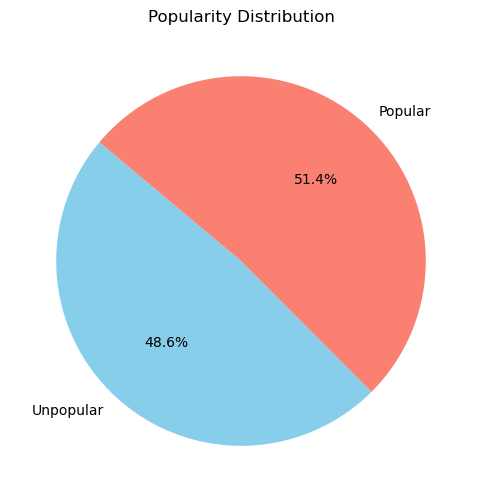

In [6]:
unpopular = df[df['Shares']<1400]
popular = df[df['Shares']>1400]
df1=[len(unpopular),len(popular)]
labels = ['Unpopular','Popular']
colors = ['skyblue', 'salmon']
plt.figure(figsize=(6, 6))
plt.pie(df1, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Popularity Distribution')
plt.show()

<font color="green">**The dataset contains 51.4% of popular news and 48.6% of unpopular news, considering 1400 shares as a threshold value.**</font>

#### Popularity Analysis over Days of Week

In [ ]:
columns_day = df.columns.values[31:39]
unpopular = df[df['Shares']<1400]
popular = df[df['Shares']>1400]
unpopular_day = unpopular[columns_day].sum().values
popular_day = popular[columns_day].sum().values

plt.figure(figsize = (16,5))
plt.title('Popular Vs Unpopular over Days of Week', fontsize=20)
plt.bar(np.arange(len(columns_day)),popular_day, width=0.3, align="center", color='r',label = 'popular')
plt.bar(np.arange(len(columns_day)) - 0.3, unpopular_day, width=0.3, align="center", color='b', label='unpopular')

plt.xticks(np.arange(len(columns_day)), columns_day)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

<font color="green">**The visual proves World channel contains more unpopular news, while scomed contains the least. Similarly Tech channel contains more popular news while lifestyle contains the least.**</font>

#### Popularity Analysis over Channel Category

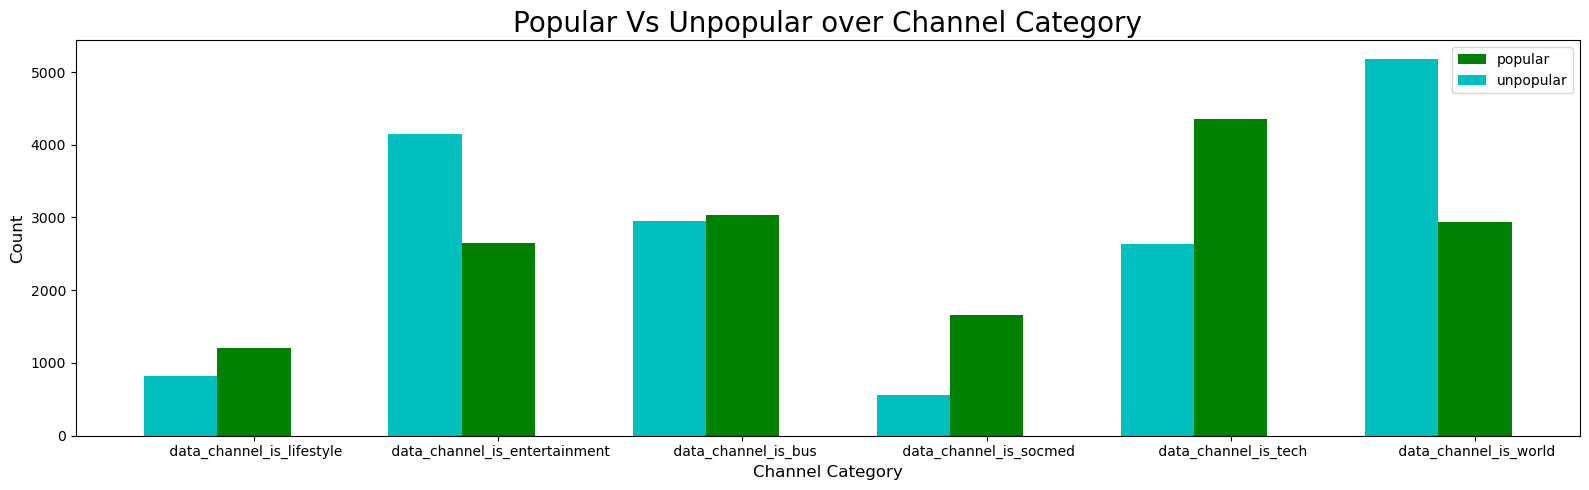

In [15]:
columns_channel = df.columns.values[12:18]
unpopular_channel = unpopular[columns_channel].sum().values
popular_channel = popular[columns_channel].sum().values

plt.figure(figsize = (16,5))
plt.title('Popular Vs Unpopular over Channel Category', fontsize=20)
plt.bar(np.arange(len(columns_channel)),popular_channel, width=0.3, align="center", color='g',label = 'popular')
plt.bar(np.arange(len(columns_channel)) - 0.3, unpopular_channel, width=0.3, align="center", color='c', label='unpopular')

plt.xticks(np.arange(len(columns_channel)), columns_channel)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Channel Category", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

<font color="green">**The visual proves World channel contains more unpopular news, while scomed contains the least. Similarly Tech channel contains more popular news while lifestyle contains the least.**</font>

#### Correlation Heatmap

A correlation heatmap is a graphical representation of the relationships between numerical variables in a dataset. It uses colors to convey the strength and direction of correlations, providing a clear and intuitive way to analyze dependencies between features.

In [16]:
corr1 = df.corr()
corr1

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Shares,url_encoded
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662,-0.998599
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783,0.240772
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459,0.059771
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806,-0.003018
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443,-0.000328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
title_sentiment_polarity,0.038711,0.000240,0.023358,-0.002333,-0.001650,-0.002910,0.039041,0.026224,0.046310,0.021980,...,0.076898,0.085878,0.078795,-0.000470,0.232130,1.000000,-0.240112,0.410205,0.012772,-0.038318
abs_title_subjectivity,0.011551,-0.146954,0.007136,-0.009242,-0.008511,-0.008572,0.009443,0.008961,-0.013759,-0.021982,...,-0.017131,-0.006573,-0.010531,-0.001877,-0.487172,-0.240112,1.000000,-0.400272,0.001481,-0.011032
abs_title_sentiment_polarity,-0.002745,0.040550,0.013439,-0.004217,-0.004391,-0.005342,0.056525,-0.006709,0.063307,0.055231,...,0.082966,-0.075594,-0.058398,-0.017444,0.714528,0.410205,-0.400272,1.000000,0.027135,0.002756
Shares,0.008662,0.008783,0.002459,0.000806,0.000443,0.000114,0.045404,-0.001900,0.039388,0.023936,...,0.010068,-0.032029,-0.019297,-0.019300,0.021967,0.012772,0.001481,0.027135,1.000000,-0.009739


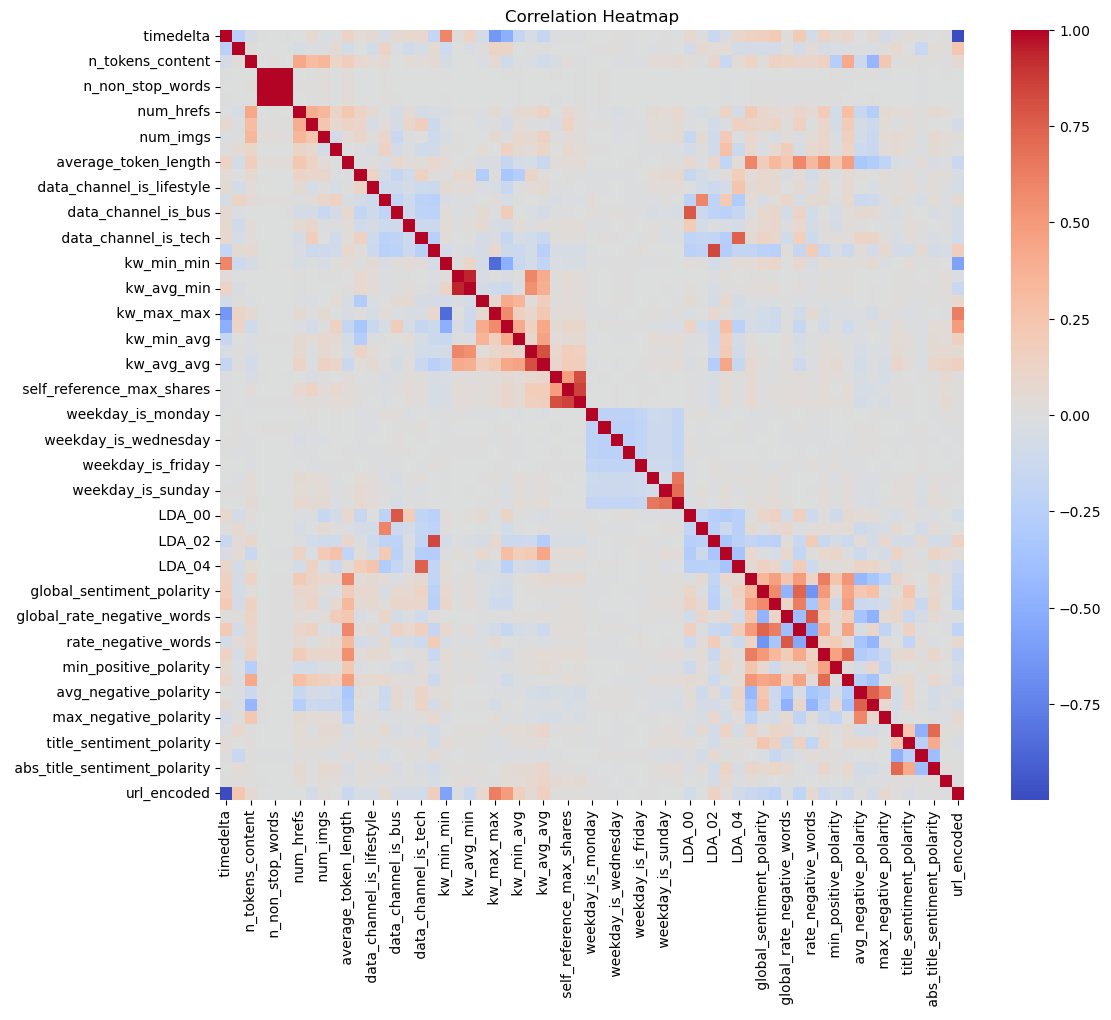

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

#### Distribution of shares

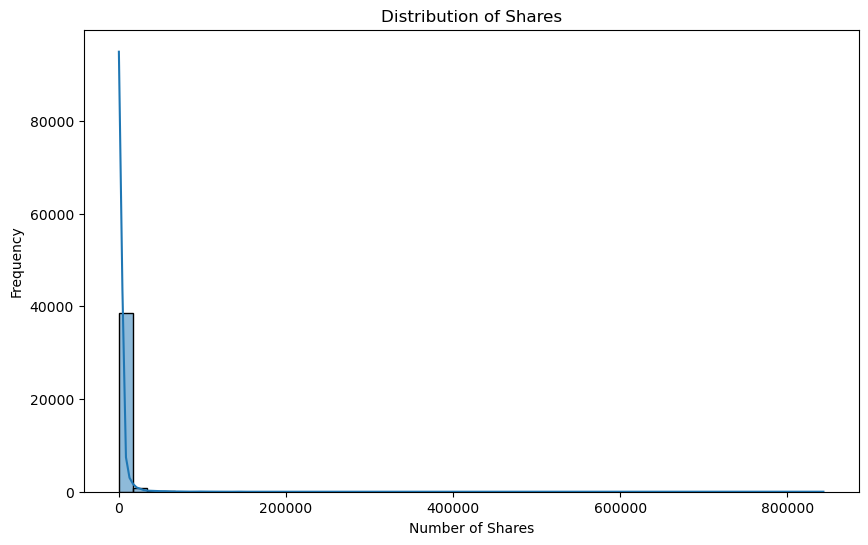

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Shares'], bins=50, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.show()

# Outlier Detection

Outliers are data points that differ significantly from other observations in a dataset. They are extreme values that lie far away from the overall pattern or distribution of the data. Outliers can result from variability in the data, measurement errors, or rare but valid occurrences.

### Target Variable ('Shares') Analysis

#### Boxplot

A boxplot is a visual tool for summarizing the distribution of a dataset and identifying potential outliers. It displays key descriptive statistics, including the median, quartiles, and any extreme values, making it an effective method for outlier detection.

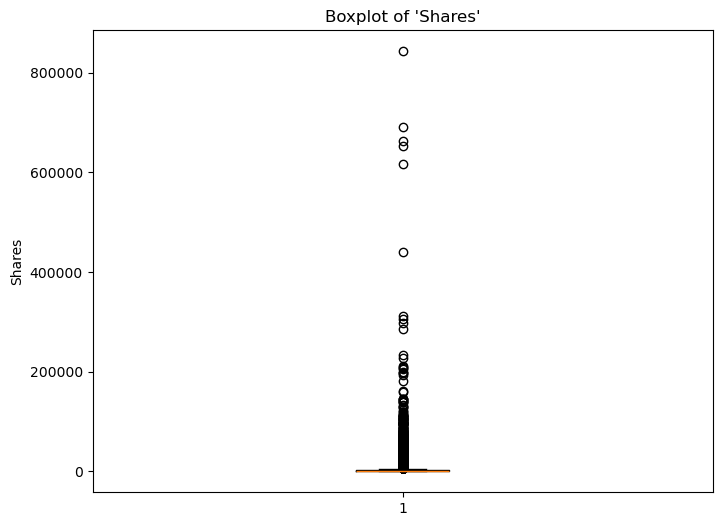

In [19]:
plt.figure(figsize=(8,6))
plt.boxplot(df['Shares'])
plt.title("Boxplot of 'Shares'")
plt.ylabel("Shares")
plt.show()

#### Histogram

Histogram is a graphical representation of the distribution of a dataset. It displays data frequencies using  intervals, making it an effective tool for identifying outliers by visualizing how data points are distributed. Outliers often appear as bars that are isolated or at the extreme ends of the histogram.

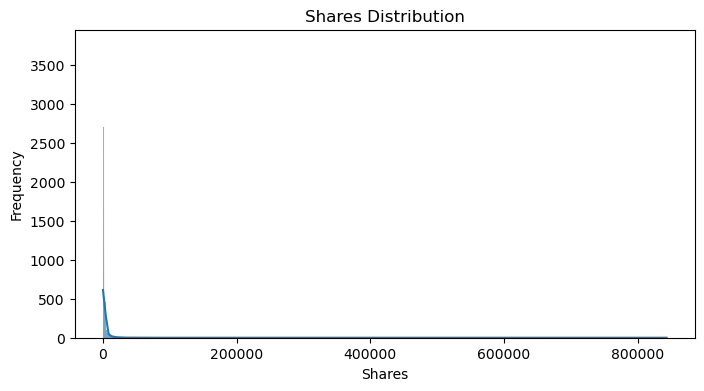

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Shares', kde=True)
plt.title('Shares Distribution')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

<font color="green">**The boxplot shows a significant outliers above 400K and the histplot shows that the 'Shares' is positively skewed, where majority values are concentrated at the left end. So we haveto apply a transformation for improving the performance of the model**</font>

### IQR Method

**The Interquartile Range** (IQR) method is a statistical technique for identifying outliers in a dataset. It uses the spread of the middle 50% of data to determine whether a data point is unusually high or low. This method is simple, effective, and widely used in data preprocessing.

**Quartiles**:

Data is divided into four equal parts:

Q1 (First Quartile): The 25th percentile (lower quartile).

Q3 (Third Quartile): The 75th percentile (upper quartile).


**Interquartile Range (IQR)**:

The IQR is the range between the first and third quartiles:

IQR = 𝑄3 − 𝑄1

**Outlier Thresholds**:

Data points are considered outliers if they fall outside:

Lower Bound = 𝑄1 − 1.5×IQR

Upper Bound = 𝑄3 + 1.5×IQR

In [7]:
q1 = df.Shares.quantile(0.25)
q3 = df.Shares.quantile(0.75)

IQR = q3-q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR
df_no_outliers = df[(df.Shares >= lower_bound) & (df.Shares <= upper_bound)]

#### Boxplot after applying IQR method

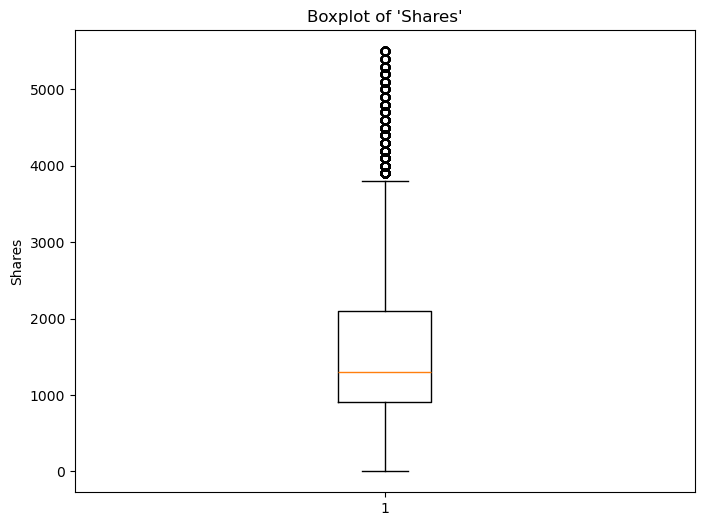

In [22]:
plt.figure(figsize=(8,6))
plt.boxplot(df_no_outliers['Shares'])
plt.title("Boxplot of 'Shares'")
plt.ylabel("Shares")
plt.show()

#### Histogram after applying IQR

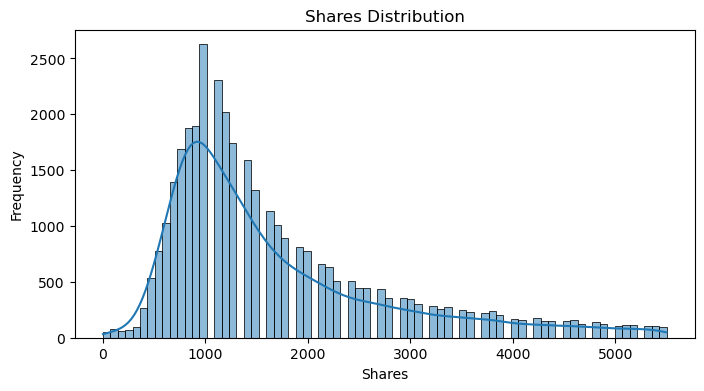

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_no_outliers, x='Shares', kde=True)
plt.title('Shares Distribution')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

### Z-score Method

The **Z-score** method is a statistical technique for identifying outliers in a dataset. It measures how far a data point deviates from the mean of the data in terms of standard deviations. Points with Z-scores that exceed a defined threshold are considered potential outliers.
The Z-score for a data point is calculated using the formula:

**𝑍 = (X-μ)/σ**

The Z-score measures how many standard deviations x is away from the mean:

Z-score of 0 means the data point is exactly at the mean.

Z-score of +1 means the data point is one standard deviation above the mean.

Z-score of -1 means the data point is one standard deviation below the mean.

In [8]:
df1 = df.copy()
df1['z_score'] = (df.Shares - df.Shares.mean()) / df.Shares.std()
df1_no_outliers = df1[(df1.z_score >-3) & (df1.z_score <3)]
df1_no_outliers.shape

(39336, 62)

#### Boxplot after applying Z-score method

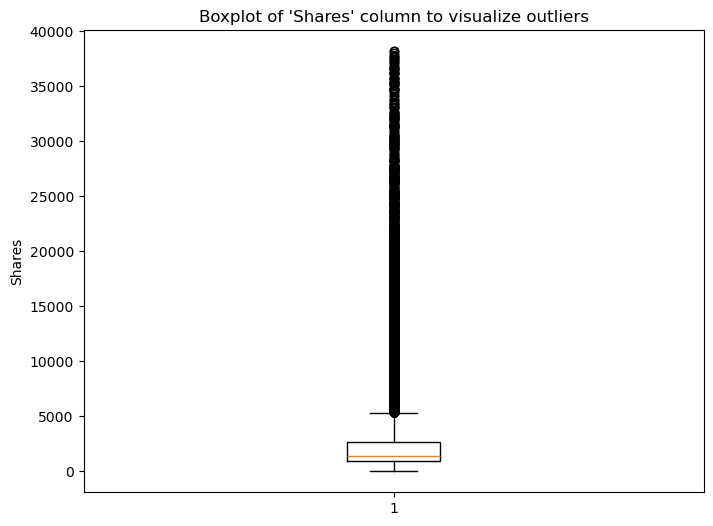

In [25]:
plt.figure(figsize=(8,6))
plt.boxplot(df1_no_outliers['Shares'])
plt.title("Boxplot of 'Shares' column to visualize outliers")
plt.ylabel("Shares")
plt.show()

#### Histogram after applying Z-score method

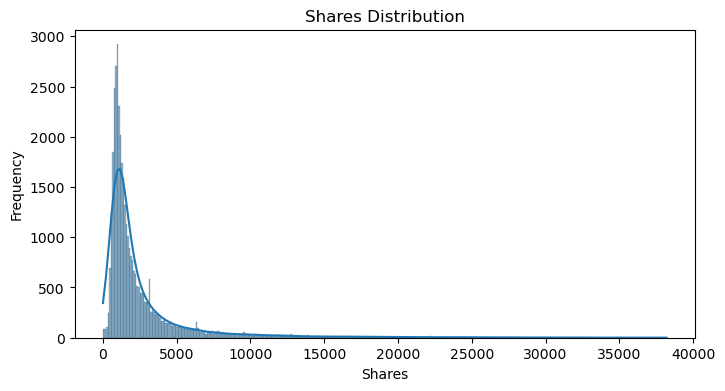

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df1_no_outliers, x='Shares', kde=True)
plt.title('Shares Distribution')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

<font color="green">**By comparing IQR method and z-score method, IQR shows better performance because after transformation, the boxplot shows only few outliers close to upper bound and histogram shows a graph which is similar to a bell curve while z-score graph is still skewed even after transformation. So we can choose IQR method as the right way to remove outliers and there by transform data**</font>

### Checking Skewness

Skewness refers to the asymmetry or deviation from symmetry in the distribution of data. A distribution is considered skewed if it is not symmetrical and has a longer or fatter tail on one side. Understanding skewness is important because it gives insights into the shape of the data distribution, which affects statistical analysis and the choice of appropriate models.

In [12]:
df.Shares.skew()  #Skewness of original dataframe

4.149608473739586

In [13]:
df_no_outliers.Shares.skew()  #Skewness of dataframe after oulier removal by IQR method

1.4331352269262176

In [14]:
df1_no_outliers.Shares.skew()  #Skewness of dataframe after oulier removal by Z-Score method

4.149608473739586

<font color='green'>**As the Skewness of data frame after removing outliers via IQR method shows a value close to 1, it shows a better performance**</font>

In [9]:
df = df1_no_outliers.copy()

In [10]:
df.drop(columns = 'z_score', inplace=True)

# Feature Importance Analysis

<font color='green'>**We can perform feature importance analysis on tree-based models like Decision Tree, Random Forest, and Gradient Boosting**</font>

Feature importance is a technique used to determine the contribution of each feature in a dataset to the predictive power of a machine learning model. Random Forest is one of the most popular algorithms for feature importance analysis because it is an ensemble learning method that uses multiple decision trees to make predictions.

Random Forest can evaluate feature importance based on how each feature contributes to reducing the error of the model, using measures like mean decrease in impurity (Gini impurity) or mean decrease in accuracy.

In [11]:
x = df.drop('Shares',axis=1)
y = df['Shares']

In [21]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(x, y)

importances = models["Random Forest Regressor"].feature_importances_
feature_names = x.columns

feature_importances = pd.DataFrame({'Feature' : feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False )

print("Feature Importances:\n", feature_importances)

Feature Importances:
                            Feature  Importance
26                      kw_avg_avg    0.079712
25                      kw_max_avg    0.035560
39                          LDA_01    0.031392
23                      kw_avg_max    0.030878
43             global_subjectivity    0.030702
10            average_token_length    0.030426
42                          LDA_04    0.029880
41                          LDA_03    0.029739
29      self_reference_avg_sharess    0.028100
5         n_non_stop_unique_tokens    0.028005
27       self_reference_min_shares    0.027946
49           avg_positive_polarity    0.026804
40                          LDA_02    0.026513
38                          LDA_00    0.026453
3                  n_unique_tokens    0.026392
20                      kw_avg_min    0.026354
45      global_rate_positive_words    0.026205
2                 n_tokens_content    0.025706
44       global_sentiment_polarity    0.024770
6                        num_hrefs    

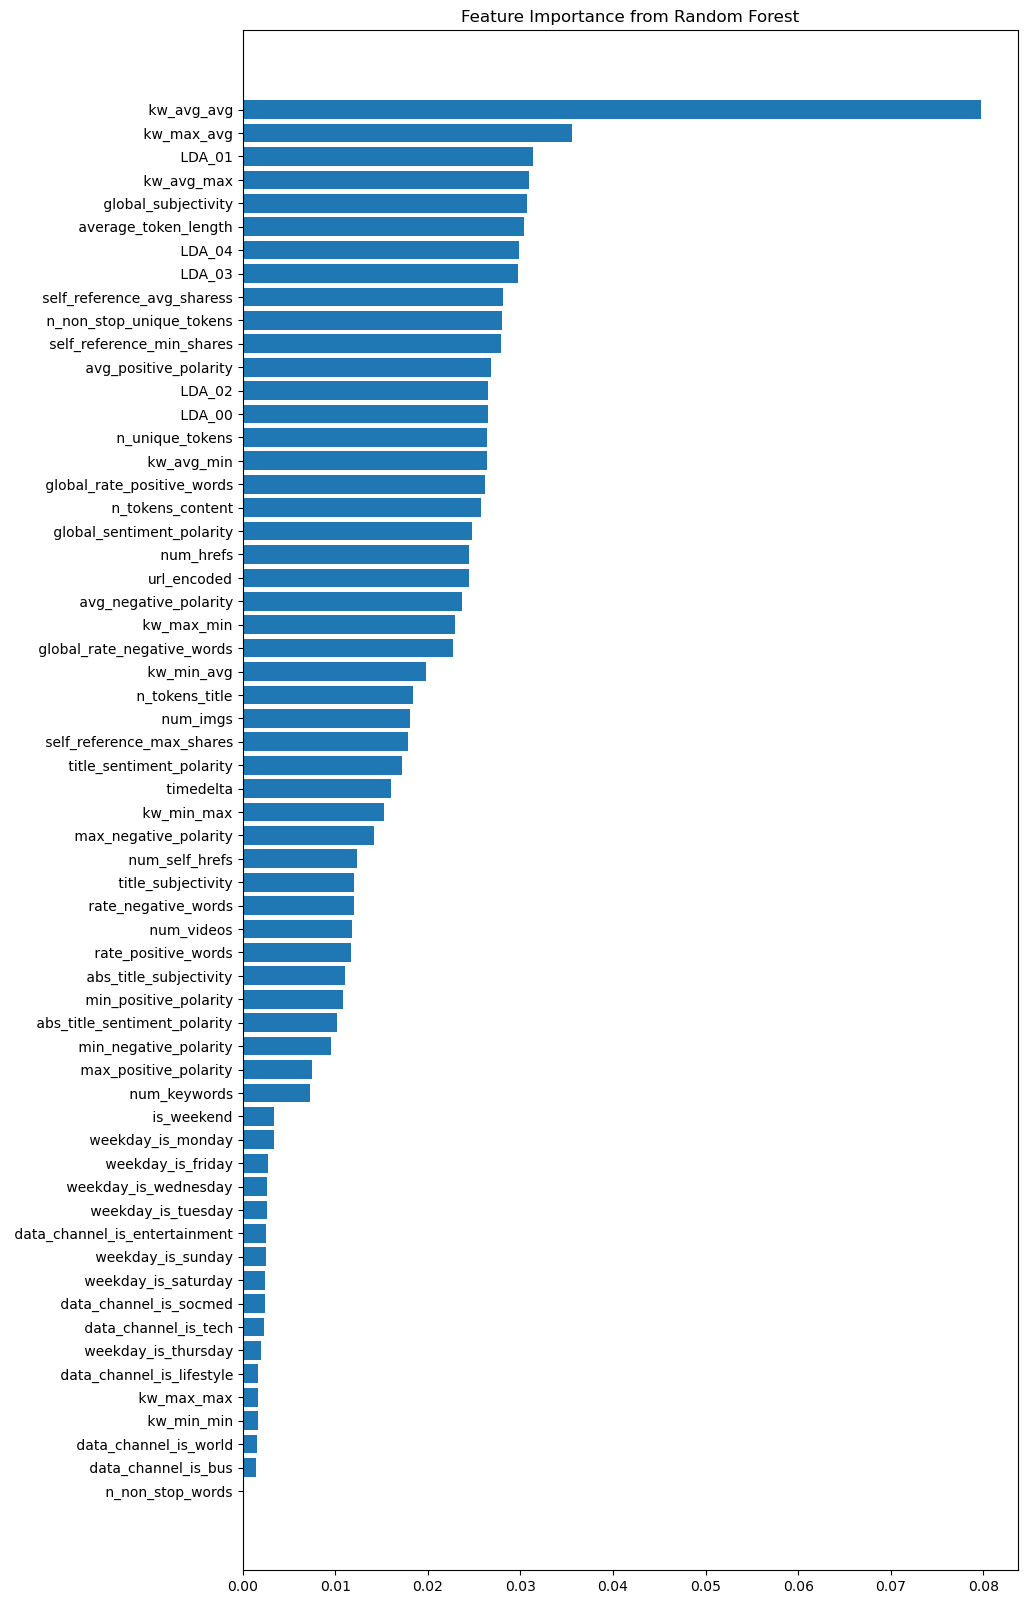

In [38]:
# Plot feature importance
plt.figure(figsize=(10, 20))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

<font color="green">**As the 'n_non_stop_words' column has a very low value of feture importance, which is 0.000085, we can drop that.**</font>

<font color="green">**Also we can drop 'timedelte' column. Even if it shows a significant value in feature importance, it is a low-importance feature as it doesn't have any domain relevence, because timedelta is the days between the article publication and the dataset acquisition**</font>

<font color="green">**Similarly 'url_encoded' also should be dropped, as it is not significant in prediction**</font>

In [12]:
df.drop([' timedelta', 'url_encoded', ' n_non_stop_words'], axis=1, inplace=True)

# Preparing Data for Model: Splitting Features and Target Variable

In machine learning, one of the crucial steps in building a model is to split the dataset into two parts: features (independent variables) and the target (dependent variable). This division helps the model learn patterns in the data by using the features to predict the target variable.

In [13]:
x = df.drop('Shares',axis=1)
y = df['Shares']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
"Training set", x_train.shape, y_train.shape

('Training set', (31468, 57), (31468,))

In [75]:
"Testing set", x_test.shape, y_test.shape

('Testing set', (7868, 57), (7868,))

<font color='green'>**The dataset has split into features (x) and target variable (y) in preparation for modeling and then split into training and testing sets using the train_test_split**</font>

### Standardizing Features

Standardization is a technique used to transform features in a dataset so that they have a mean of 0 and a standard deviation of 1. This process is essential for machine learning algorithms that rely on the distance between data points or assume that the data is normally distributed. It ensures that all features contribute equally to the model, regardless of their original scale or units.

In [15]:
scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)

In [16]:
x_train = x_train_scaled

<font color='green'>**If we standardize or normalize before splitting, the test data will influence the scaling parameters (e.g., mean, standard deviation, or range). This leads to data leakage, as information from the test set indirectly influences the training process. Tht's why we did it after splitting**</font>

In [17]:
x_test_scaled = scaler.fit_transform(x_test)
x_test = x_test_scaled

<font color='green'>**Similarly we did on testing set too**</font>

# Model Implementation

**1.Linear Regression**
Linear Regression is one of the simplest and most widely used algorithms in machine learning for predicting a continuous target variable based on one or more independent features. The model assumes a linear relationship between the target variable y and the features X.

The equation for a simple linear regression model is:
𝑦 = 𝛽0 + 𝛽1𝑋1 + 𝛽2𝑋2 + ... + 𝛽𝑛𝑋𝑛 + 𝜖

**2. Decision Tree Regressor**
Decision Tree Regressor is a non-linear model that builds a decision tree to predict a target variable by recursively splitting the data into subsets based on feature values. It is a type of supervised learning model that is used for regression tasks.

The decision tree splits the data into smaller subsets based on the value of a feature that minimizes the variance or error within each subset.

Each split forms a decision node, and each leaf node represents a predicted value for the target variable.

The decision tree model makes decisions by following the branches from the root node to the leaf nodes.

**3. Random Forest Regressor**
Random Forest Regressor is an ensemble learning method that builds multiple decision trees and combines their outputs to improve prediction accuracy. It is based on the bagging technique, where each tree is trained on a random subset of the data.

Random forests create multiple decision trees by randomly sampling subsets of data and features. Each tree is trained independently, and their predictions are averaged (for regression tasks) to make the final prediction.

It helps mitigate the overfitting problem of individual decision trees by averaging over many trees.

**4. Gradient Boosting Regressor**
Gradient Boosting Regressor is an ensemble learning technique that builds trees sequentially, where each tree tries to correct the errors made by the previous one. It uses a boosting method, which means that it focuses on the hardest-to-predict data points.

The gradient boosting model creates decision trees one at a time, each correcting the errors of the previous tree by fitting a model to the residuals (errors) of the predictions.

The idea is to minimize the residual sum of squares (RSS) between the true values and the predicted values.

It uses a gradient descent algorithm to minimize the loss function and optimize the model.

**5. Support Vector Regressor (SVR)**
Support Vector Regressor (SVR) is a type of Support Vector Machine (SVM), which is used for regression tasks. SVR tries to find a function that approximates the target values within a certain margin of error, while simultaneously keeping the model as simple as possible.

SVR works by finding a hyperplane in a high-dimensional feature space that best fits the data, while allowing for some margin of error.

Unlike linear regression, which aims to minimize the squared error, SVR tries to minimize the error within a predefined epsilon margin (a small tolerance of error).

It uses the kernel trick to transform the data into a higher-dimensional space where it can find non-linear relationships.

### Model Building

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Dictionary to store the results
results = {}

### Model Training

In [22]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "R-squared": r2,
        "MSE": mse,
        "MAE": mae
    }

### Model Evaluation

<font color = 'green'>**For model evaluation, we will calculate the R², MSE, and MAE for each model on the test set.**</font>

In [23]:
for model_name, metrics in results.items():
    print(f"{model_name}:\n R-squared: {metrics['R-squared']}, MSE: {metrics['MSE']}, MAE: {metrics['MAE']}\n")

Linear Regression:
 R-squared: -5.892733470291803e+18, MSE: 8.790164266279174e+25, MAE: 7054167570055.507

Decision Tree Regressor:
 R-squared: -1.452435868295447, MSE: 36582876.59456024, MAE: 3142.12963904423

Random Forest Regressor:
 R-squared: 0.02727833704318916, MSE: 14510045.712851841, MAE: 2289.278028723945

Gradient Boosting Regressor:
 R-squared: 0.07075717542127957, MSE: 13861473.817691118, MAE: 2049.1845713623784

Support Vector Regressor:
 R-squared: -0.09715640139144766, MSE: 16366233.162676848, MAE: 1743.2109136714714



<font color = 'green'>**Inference from the Performance Metrics :**</font>

The <font color ="red">**Gradient Boosting Regressor is the best-performing model**</font> based on: 
-  The highest R² : (0.071) which is close to 1
-  The lowest MSE (13,861,473.82)
-  A reasonably low MAE (2,049.18)

While the Support Vector Regressor has the lowest MAE, its  R² negative makes it less reliable for prediction.

# Hyperparameter Tuning

In [ ]:
models = {
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 1, 6],
    'min_samples_leaf': [1, 2, 4],
}
for name, model in models.items():
    grid_search_rf = GridSearchCV(estimator= model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search_rf.fit(x_train, y_train)
    print("Best Parameters of ", name, " ", grid_search_rf.best_params_)
    print("Best Score of ", name, " ",  grid_search_rf.best_score_)

    best_model = grid_search_rf.best_estimator_
    y_pred_best = best_model.predict(x_test)

    # Performance of the best model
    mse_best = mean_squared_error(y_test, y_pred_best)
    mae_best = mean_absolute_error(y_test, y_pred_best)
    r2_best = r2_score(y_test, y_pred_best)

    print(f"Best Model Performance of {name} :\n R² : {r2_best}, MSE: {mse_best}, MAE: {mae_best}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 1, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=models["Gradient Boosting Regressor"],param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1
)

# Perform grid search
grid_search.fit(x_train, y_train)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


#### Check the best parameters and best score

In [ ]:
# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [ ]:
# Performance of the best model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Performance:\n R-squared: {r2_best}, MSE: {mse_best}, MAE: {mae_best}")

# Conclusion

This project demonstrated that machine learning can effectively analyze and predict online article popularity, offering insights into the factors driving virality. The results could aid content creators and digital marketers in optimizing article performance by focusing on influential features such as channel selection, timing of publication, and keyword usage.

However, the inherent variability in human behavior and external factors (e.g., breaking news, trends) limits the scope of purely data-driven predictions. Future research could incorporate additional data sources, such as social media metrics or sentiment analysis, to enhance model performance and applicability.